In [1]:
%matplotlib inline
import numpy as np
from astropy.table import Table, join, hstack
import matplotlib.pyplot as plt


In [6]:
# DR17
tab = Table.read("/Users/alexji/APOGEE/allStarLite-dr17-synspec_rev1.fits")[1:]
# tab = tab[tab["EXTRATARG"]==0]

In [7]:
baumgardt = Table.read("/Users/alexji/APOGEE/baumgardt_combined_table.txt", format="ascii.fixed_width_two_line")
baumgardt["index"] = np.arange(len(baumgardt))

In [12]:
from astropy.coordinates import SkyCoord
tcoo, bcoo = SkyCoord(tab["RA"], tab["DEC"], unit="deg"), SkyCoord(baumgardt["RA"], baumgardt["DEC"], unit="deg")
idx, d2d, _ = bcoo.match_to_catalog_sky(tcoo)
iimatch = d2d.arcsec < 1
mbaum = baumgardt[iimatch]
mtab  = tab[idx[iimatch]]

In [13]:
mtab["GAIAEDR3_SOURCE_ID","RA","DEC"].write("baumgardt_coord.csv", format="ascii.csv", overwrite=True)

In [14]:
from astroquery.gaia import Gaia
Gaia.login()

INFO: Login to gaia TAP server [astroquery.gaia.core]
User: aji
Password: ········
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK


In [17]:
# Gaia.upload_table(mtab["GAIAEDR3_SOURCE_ID","RA","DEC"],"apobaum")
## Just did this manually on the archive
# Gaia.update_user_table("apobaum", [["RA","flags","Ra"], ["DEC","flags","Dec"]])
Gaia.cross_match("user_aji.apobaum", "gaiadr3.gaia_source", "xmatch_apobaum_gaia_source", verbose=True)

Launched query: 'SELECT crossmatch_positional('user_aji','apobaum','gaiadr3','gaia_source',1.0, 'xmatch_apobaum_gaia_source') FROM dual;'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
Content-type = application/x-www-form-urlencoded
303 303
[('Date', 'Tue, 14 Jun 2022 15:03:22 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Location', 'https://gea.esac.esa.int/tap-server/tap/async/1655219002422O'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/plain;charset=ISO-8859-1')]
job 1655219002422O, at: https://gea.esac.esa.int/tap-server/tap/async/1655219002422O
Retrieving async. results...
INFO: Query finished. [astroquery.utils.tap.core]


In [50]:
query = """SELECT TOP 100000
b.ra, b.dec, b.parallax, b.parallax_error, b.pmra, b.pmra_error, b.pmdec, b.pmdec_error, b.radial_velocity, b.radial_velocity_error,
b.phot_g_mean_mag, b.phot_bp_mean_mag, b.phot_rp_mean_mag, b.phot_bp_rp_excess_factor, 
c.*
FROM user_aji.apobaum as a
INNER JOIN
gaiadr3.gaia_source_lite as b ON a.gaiaedr3_source_id = b.source_id
INNER JOIN
gaiadr3.astrophysical_parameters as c ON b.source_id = c.source_id
"""

In [51]:
%%time
j = Gaia.launch_job(query, "apobaum1",verbose=True)
gbaum = j.get_data()

Launched query: 'SELECT TOP 100000
b.ra, b.dec, b.parallax, b.parallax_error, b.pmra, b.pmra_error, b.pmdec, b.pmdec_error, b.radial_velocity, b.radial_velocity_error,
b.phot_g_mean_mag, b.phot_bp_mean_mag, b.phot_rp_mean_mag, b.phot_bp_rp_excess_factor, 
c.*
FROM user_aji.apobaum as a
INNER JOIN
gaiadr3.gaia_source_lite as b ON a.gaiaedr3_source_id = b.source_id
INNER JOIN
gaiadr3.astrophysical_parameters as c ON b.source_id = c.source_id
'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/sync
Content-type = application/x-www-form-urlencoded
200 200
[('Date', 'Tue, 14 Jun 2022 15:17:43 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Content-Encoding', 'gzip'), ('Content-Disposition', 'attachment;filename=

Query finished.
CPU times: user 10.6 s, sys: 362 ms, total: 11 s
Wall time: 2min 16s


In [52]:
gbaum

ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_bp_rp_excess_factor,solution_id,source_id,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,classprob_dsc_combmod_whitedwarf,classprob_dsc_combmod_binarystar,classprob_dsc_specmod_quasar,classprob_dsc_specmod_galaxy,classprob_dsc_specmod_star,classprob_dsc_specmod_whitedwarf,classprob_dsc_specmod_binarystar,classprob_dsc_allosmod_quasar,classprob_dsc_allosmod_galaxy,classprob_dsc_allosmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,abp_gspphot,abp_gspphot_lower,abp_gspphot_upper,arp_gspphot,arp_gspphot_lower,arp_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,mg_gspphot,mg_gspphot_lower,mg_gspphot_upper,radius_gspphot,radius_gspphot_lower,radius_gspphot_upper,logposterior_gspphot,mcmcaccept_gspphot,libname_gspphot,teff_gspspec,teff_gspspec_lower,teff_gspspec_upper,logg_gspspec,logg_gspspec_lower,logg_gspspec_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,fem_gspspec_nlines,fem_gspspec_linescatter,sife_gspspec,sife_gspspec_lower,sife_gspspec_upper,sife_gspspec_nlines,sife_gspspec_linescatter,cafe_gspspec,cafe_gspspec_lower,cafe_gspspec_upper,cafe_gspspec_nlines,cafe_gspspec_linescatter,tife_gspspec,tife_gspspec_lower,tife_gspspec_upper,tife_gspspec_nlines,tife_gspspec_linescatter,mgfe_gspspec,mgfe_gspspec_lower,mgfe_gspspec_upper,mgfe_gspspec_nlines,mgfe_gspspec_linescatter,ndfe_gspspec,ndfe_gspspec_lower,ndfe_gspspec_upper,ndfe_gspspec_nlines,ndfe_gspspec_linescatter,feiim_gspspec,feiim_gspspec_lower,feiim_gspspec_upper,feiim_gspspec_nlines,feiim_gspspec_linescatter,sfe_gspspec,sfe_gspspec_lower,sfe_gspspec_upper,sfe_gspspec_nlines,sfe_gspspec_linescatter,zrfe_gspspec,zrfe_gspspec_lower,zrfe_gspspec_upper,zrfe_gspspec_nlines,zrfe_gspspec_linescatter,nfe_gspspec,nfe_gspspec_lower,nfe_gspspec_upper,nfe_gspspec_nlines,nfe_gspspec_linescatter,crfe_gspspec,crfe_gspspec_lower,crfe_gspspec_upper,crfe_gspspec_nlines,crfe_gspspec_linescatter,cefe_gspspec,cefe_gspspec_lower,cefe_gspspec_upper,cefe_gspspec_nlines,cefe_gspspec_linescatter,nife_gspspec,nife_gspspec_lower,nife_gspspec_upper,nife_gspspec_nlines,nife_gspspec_linescatter,cn0ew_gspspec,cn0ew_gspspec_uncertainty,cn0_gspspec_centralline,cn0_gspspec_width,dib_gspspec_lambda,dib_gspspec_lambda_uncertainty,dibew_gspspec,dibew_gspspec_uncertainty,dibewnoise_gspspec_uncertainty,dibp0_gspspec,dibp2_gspspec,dibp2_gspspec_uncertainty,dibqf_gspspec,flags_gspspec,logchisq_gspspec,ew_espels_halpha,ew_espels_halpha_uncertainty,ew_espels_halpha_flag,ew_espels_halpha_model,classlabel_espels,classlabel_espels_flag,classprob_espels_wcstar,classprob_espels_wnstar,classprob_espels_bestar,classprob_espels_ttauristar,classprob_espels_herbigstar,classprob_espels_dmestar,classprob_espels_pne,azero_esphs,azero_esphs_uncertainty,ag_esphs,ag_esphs_uncertainty,ebpminrp_esphs,ebpminrp_esphs_uncertainty,teff_esphs,teff_esphs_uncertainty,logg_esphs,logg_esphs_uncertainty,vsini_esphs,vsini_esphs_uncertainty,flags_esphs,spectraltype_esphs,activityindex_espcs,activityindex_espcs_uncertainty,activityindex_espcs_input,teff_espucd,teff_espucd_uncertainty,flags_espucd,radius_flame,radius_flame_lower,radius_flame_upper,lum_flame,lum_flame_lower,lum_flame_upper,mass_flame,mass_flame_lower,mass_flame_upper,age_flame,age_flame_lower,age_flame_upper,flags_flame,evolstage_flame,gravredshift_flame,gravredshift_flame_lower,gravredshift_flame_upper,bc_flame,mh_msc,mh_msc_upper,mh_msc_lower,azero_msc,azero_msc_upper,azero_msc_lower,

In [53]:
for col in gbaum.colnames:
    c = gbaum[col]
    if c.dtype == 'O':
        gbaum[col] = gbaum[col].astype(str)

In [54]:
gbaum.write("baumgardt1-result.fits.gz", overwrite=True)

In [55]:
gbaum = Table.read("baumgardt1-result.fits.gz")

In [56]:
gbaum

ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_bp_rp_excess_factor,solution_id,source_id,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,classprob_dsc_combmod_whitedwarf,classprob_dsc_combmod_binarystar,classprob_dsc_specmod_quasar,classprob_dsc_specmod_galaxy,classprob_dsc_specmod_star,classprob_dsc_specmod_whitedwarf,classprob_dsc_specmod_binarystar,classprob_dsc_allosmod_quasar,classprob_dsc_allosmod_galaxy,classprob_dsc_allosmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,abp_gspphot,abp_gspphot_lower,abp_gspphot_upper,arp_gspphot,arp_gspphot_lower,arp_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,mg_gspphot,mg_gspphot_lower,mg_gspphot_upper,radius_gspphot,radius_gspphot_lower,radius_gspphot_upper,logposterior_gspphot,mcmcaccept_gspphot,libname_gspphot,teff_gspspec,teff_gspspec_lower,teff_gspspec_upper,logg_gspspec,logg_gspspec_lower,logg_gspspec_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,fem_gspspec_nlines,fem_gspspec_linescatter,sife_gspspec,sife_gspspec_lower,sife_gspspec_upper,sife_gspspec_nlines,sife_gspspec_linescatter,cafe_gspspec,cafe_gspspec_lower,cafe_gspspec_upper,cafe_gspspec_nlines,cafe_gspspec_linescatter,tife_gspspec,tife_gspspec_lower,tife_gspspec_upper,tife_gspspec_nlines,tife_gspspec_linescatter,mgfe_gspspec,mgfe_gspspec_lower,mgfe_gspspec_upper,mgfe_gspspec_nlines,mgfe_gspspec_linescatter,ndfe_gspspec,ndfe_gspspec_lower,ndfe_gspspec_upper,ndfe_gspspec_nlines,ndfe_gspspec_linescatter,feiim_gspspec,feiim_gspspec_lower,feiim_gspspec_upper,feiim_gspspec_nlines,feiim_gspspec_linescatter,sfe_gspspec,sfe_gspspec_lower,sfe_gspspec_upper,sfe_gspspec_nlines,sfe_gspspec_linescatter,zrfe_gspspec,zrfe_gspspec_lower,zrfe_gspspec_upper,zrfe_gspspec_nlines,zrfe_gspspec_linescatter,nfe_gspspec,nfe_gspspec_lower,nfe_gspspec_upper,nfe_gspspec_nlines,nfe_gspspec_linescatter,crfe_gspspec,crfe_gspspec_lower,crfe_gspspec_upper,crfe_gspspec_nlines,crfe_gspspec_linescatter,cefe_gspspec,cefe_gspspec_lower,cefe_gspspec_upper,cefe_gspspec_nlines,cefe_gspspec_linescatter,nife_gspspec,nife_gspspec_lower,nife_gspspec_upper,nife_gspspec_nlines,nife_gspspec_linescatter,cn0ew_gspspec,cn0ew_gspspec_uncertainty,cn0_gspspec_centralline,cn0_gspspec_width,dib_gspspec_lambda,dib_gspspec_lambda_uncertainty,dibew_gspspec,dibew_gspspec_uncertainty,dibewnoise_gspspec_uncertainty,dibp0_gspspec,dibp2_gspspec,dibp2_gspspec_uncertainty,dibqf_gspspec,flags_gspspec,logchisq_gspspec,ew_espels_halpha,ew_espels_halpha_uncertainty,ew_espels_halpha_flag,ew_espels_halpha_model,classlabel_espels,classlabel_espels_flag,classprob_espels_wcstar,classprob_espels_wnstar,classprob_espels_bestar,classprob_espels_ttauristar,classprob_espels_herbigstar,classprob_espels_dmestar,classprob_espels_pne,azero_esphs,azero_esphs_uncertainty,ag_esphs,ag_esphs_uncertainty,ebpminrp_esphs,ebpminrp_esphs_uncertainty,teff_esphs,teff_esphs_uncertainty,logg_esphs,logg_esphs_uncertainty,vsini_esphs,vsini_esphs_uncertainty,flags_esphs,spectraltype_esphs,activityindex_espcs,activityindex_espcs_uncertainty,activityindex_espcs_input,teff_espucd,teff_espucd_uncertainty,flags_espucd,radius_flame,radius_flame_lower,radius_flame_upper,lum_flame,lum_flame_lower,lum_flame_upper,mass_flame,mass_flame_lower,mass_flame_upper,age_flame,age_flame_lower,age_flame_upper,flags_flame,evolstage_flame,gravredshift_flame,gravredshift_flame_lower,gravredshift_flame_upper,bc_flame,mh_msc,mh_msc_upper,mh_msc_lower,azero_msc,azero_msc_upper,azero_msc_lower,

In [57]:
baumgardtall = hstack([mbaum, mtab])
baumgardtall = join(baumgardtall, gbaum, keys_left="GAIAEDR3_SOURCE_ID", keys_right="source_id")

In [59]:
def get_photcut(mtab):
    flag = mtab["phot_bp_rp_excess_factor"] < 1.3 + 0.06*(mtab["phot_bp_mean_mag"]-mtab["phot_rp_mean_mag"])**2
    return flag

In [66]:
good_clusters = []
ii2 = baumgardtall["P_Mem"] > 0.8
ii3 = get_photcut(baumgardtall)
for cluster in np.unique(baumgardtall["Cluster"]):
    ii1 = baumgardtall["Cluster"] == cluster
    if np.sum(ii1 & ii2 & ii3) >= 10:
        good_clusters.append(cluster)
        print(f"{cluster} -- {np.sum(ii1 & ii3)} {np.sum(ii1 & ii2 & ii3)}")

NGC 104 -- 466 63
NGC 1851 -- 653 16
NGC 2808 -- 379 14
NGC 288 -- 365 29
NGC 3201 -- 537 26
NGC 4590 -- 350 11
NGC 5139 -- 1654 263
NGC 5272 -- 330 27
NGC 5904 -- 382 37
NGC 6121 -- 901 75
NGC 6171 -- 412 10
NGC 6205 -- 289 33
NGC 6218 -- 530 17
NGC 6254 -- 413 18
NGC 6341 -- 240 14
NGC 6388 -- 262 21
NGC 6397 -- 398 47
NGC 6544 -- 1081 11
NGC 6656 -- 807 68
NGC 6715 -- 593 16
NGC 6752 -- 330 26
NGC 6809 -- 394 15
NGC 6838 -- 441 17
NGC 7078 -- 622 28


In [62]:
baumgardtall.write("baumgardtall.fits", overwrite=True)

# Now we do the massive comparison

In [68]:
gc

Cluster,RA_1,DEC_1,DCEN,RV,E_RV,P_Mem,NRV,MJD,PSingle,G,Gerr,BPRP,B,PMemPM,index,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA_2,DEC_2,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,ASPCAP_CHI2,PARAMFLAG [9],ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,X_H [27],X_H_ERR [27],X_M [27],X_M_ERR [27],ELEM_CHI2 [27],ELEMFRAC [27],EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC [27],X_M_SPEC [27],TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_bp_rp_excess_factor,solution_id,source_id,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,classprob_dsc_combmod_whitedwarf,classprob_dsc_combmod_binarystar,classprob_dsc_specmod_quasar,classprob_dsc_specmod_galaxy,classprob_dsc_specmod_star,classprob_dsc_specmod_whitedwarf,classprob_dsc_specmod_binarystar,classprob_dsc_allosmod_quasar,classprob_dsc_allosmod_galaxy,classprob_dsc_allosmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,abp_gspphot,abp_gspphot_lower,abp_gspphot_upper,arp_gspphot,arp_gspphot_lower,arp_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,mg_gspphot,mg_gspphot_lower,mg_gspphot_upper,radius_gspphot,radius_gspphot_lower,radius_gspphot_upper,logposterior_gspphot,mcmcaccept_gspphot,libname_gspphot,teff_gspspec,teff_gspspec_lower,teff_gspspec_upper,logg_gspspec,logg_gspspec_lower,logg_gspspec_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,fem_gspspec_nlines,fem_gspspec_linescatter,sife_gspspec,sife_gspspec_lower,sife_gspspec_upper,sife_gspspec_nlines,sife_gspspec_linescatter,cafe_gspspec,cafe_gspspec_lower,cafe_gspspec_upper,cafe_gspspec_nlines,cafe_gspspec_linescatter,tife_gspspec,tife_gspspec_lower,tife_gspspec_upper,tife_gspspec_nlines,tife_gspspec_linescatter,mgfe_gspspec,mgfe_gspspec_lower,mgfe_gspspec_upper,mgfe_gspspec_nlines,mgfe_gspspec_linescatter,ndfe_gspspec,ndfe_gspspec_lower,ndf

In [71]:
!mkdir gc_plots

/var/folders/qp/rx99k3m53qbbrzgzgcwnwtsh0000gn/T/ipykernel_26157/524028802.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(3, figsize=(6,12))


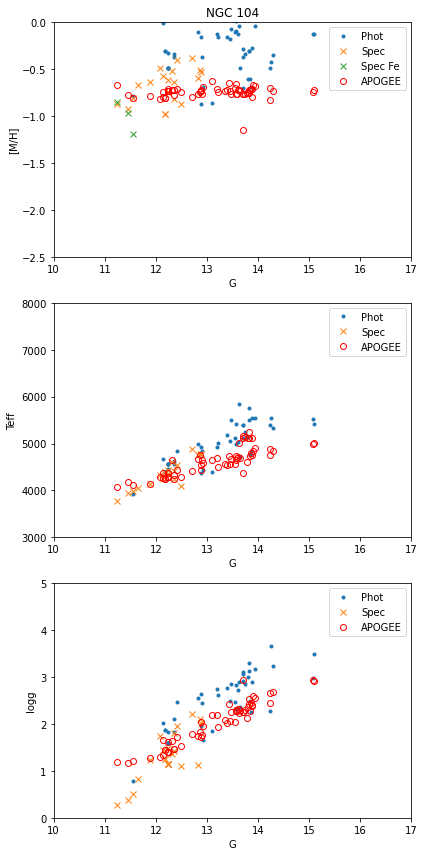

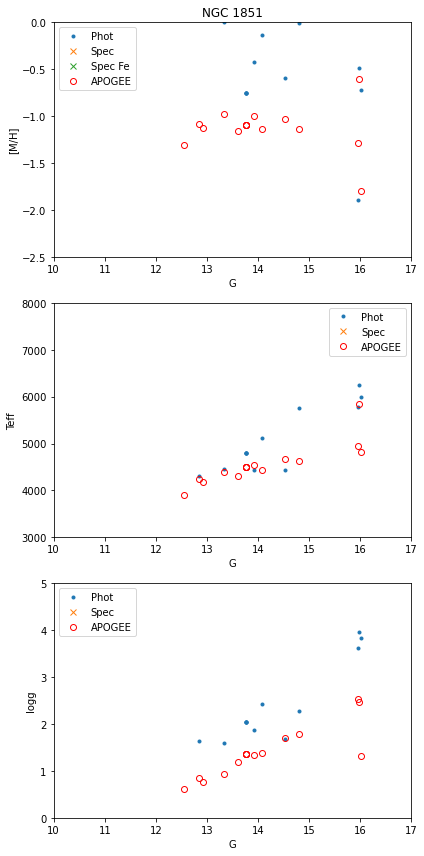

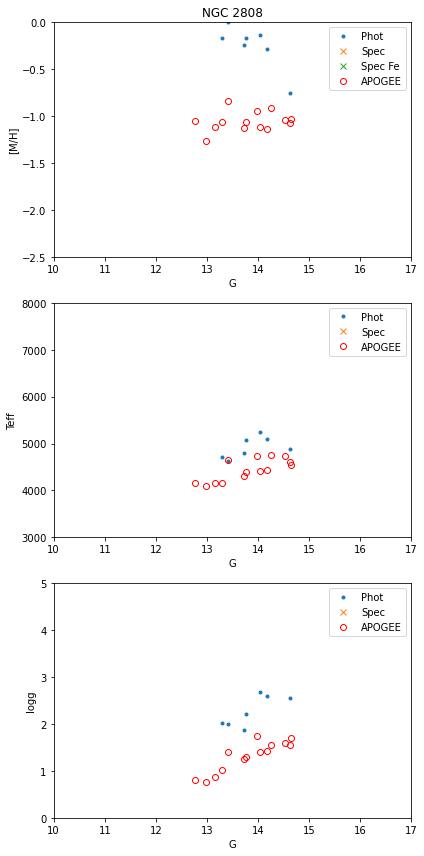

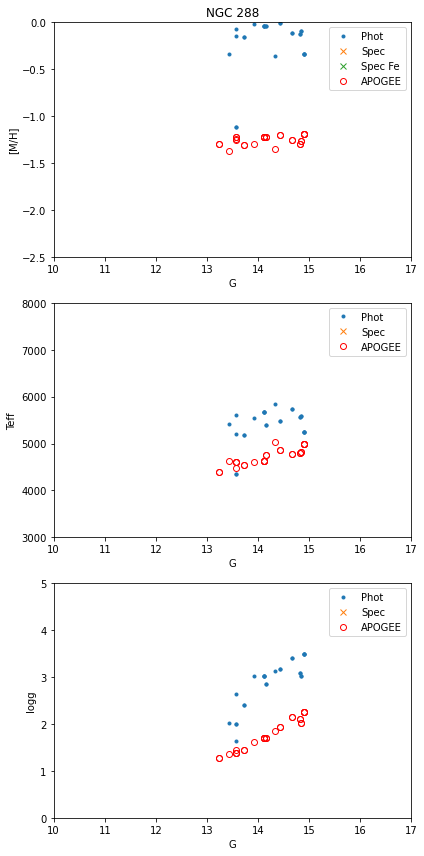

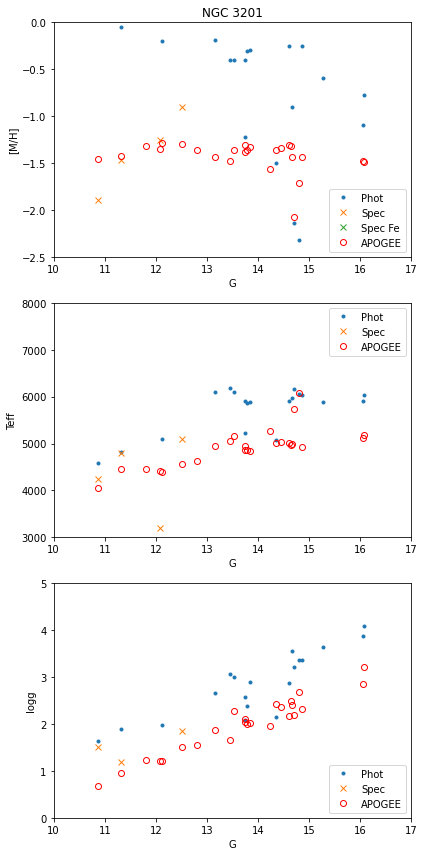

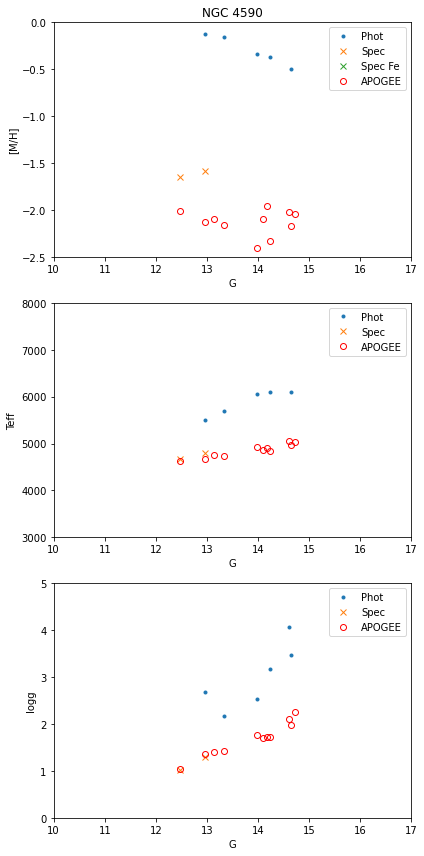

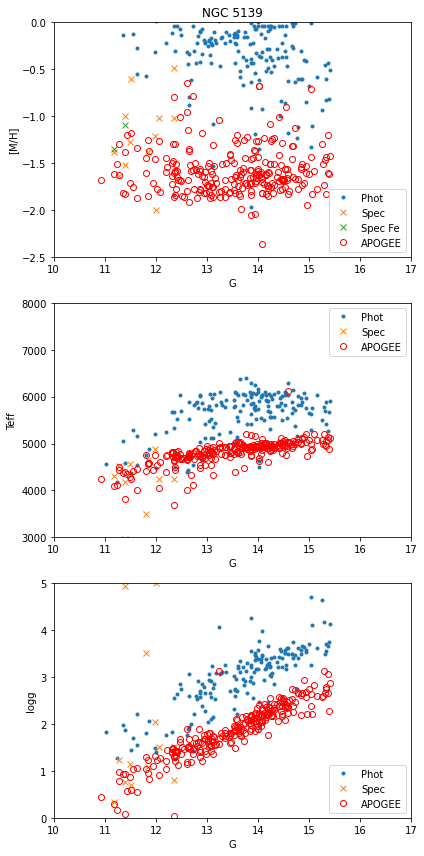

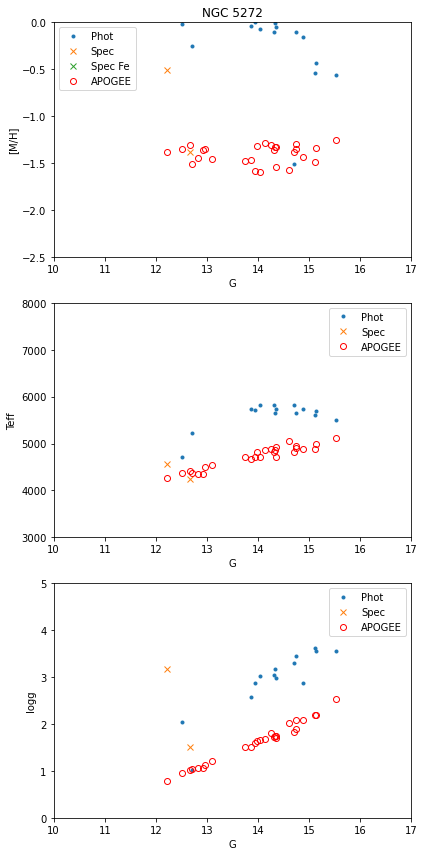

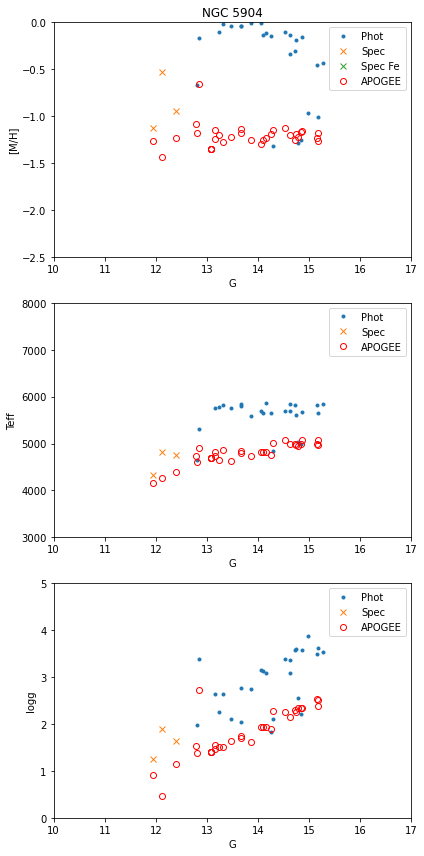

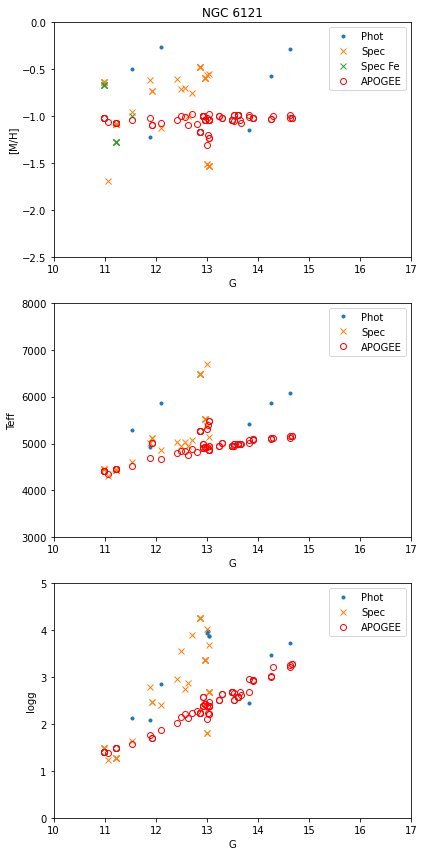

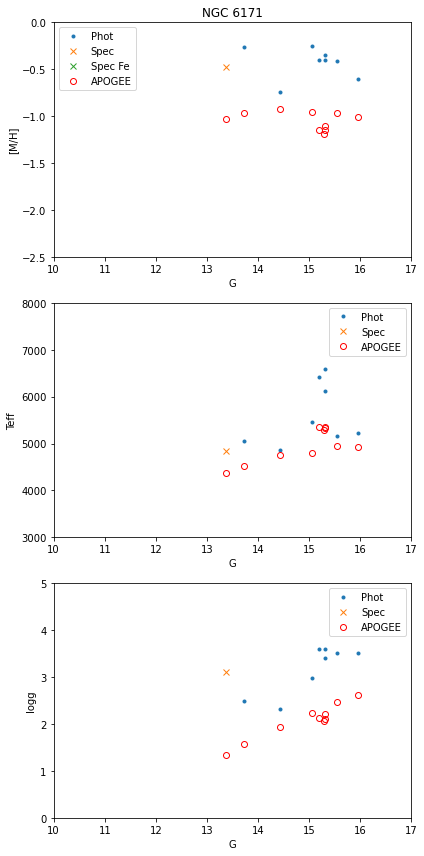

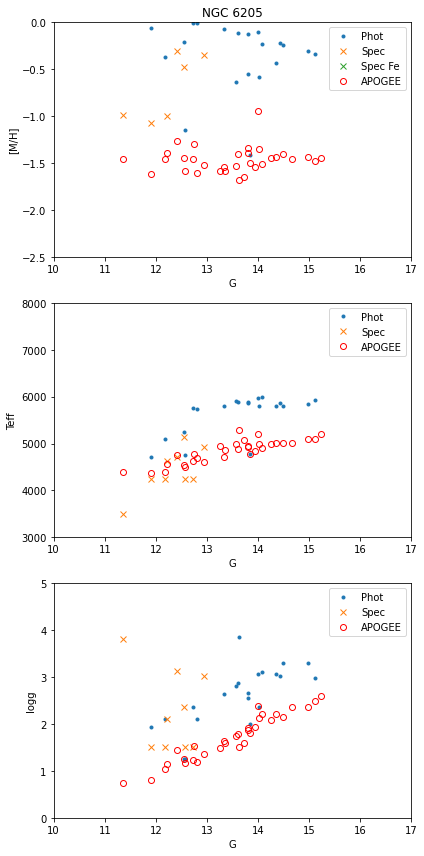

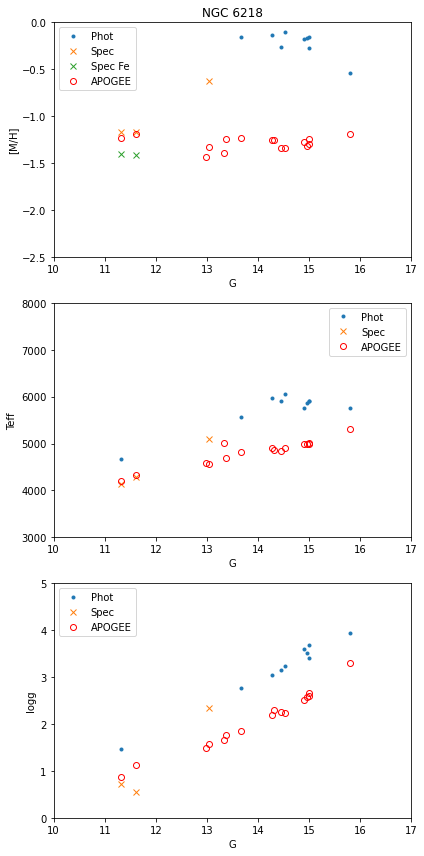

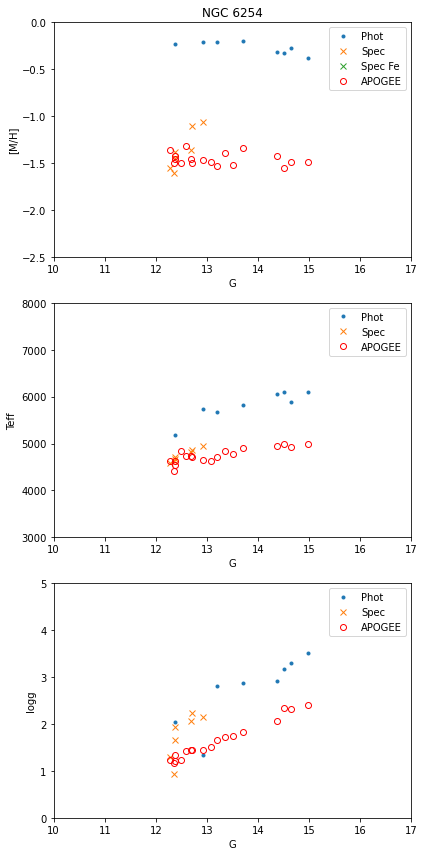

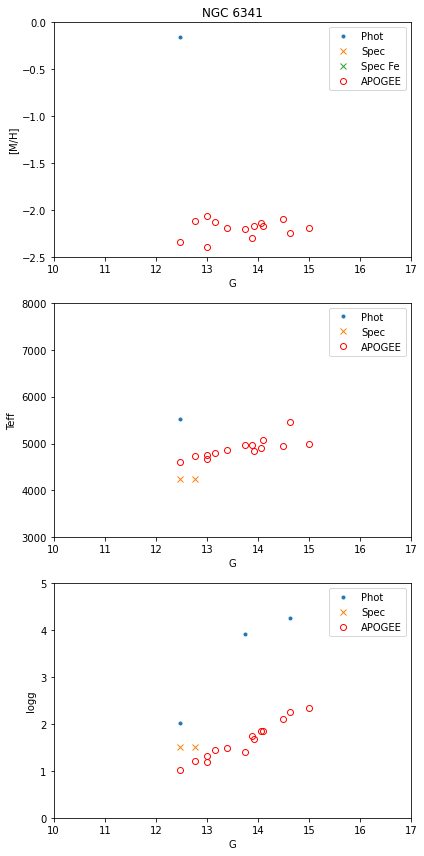

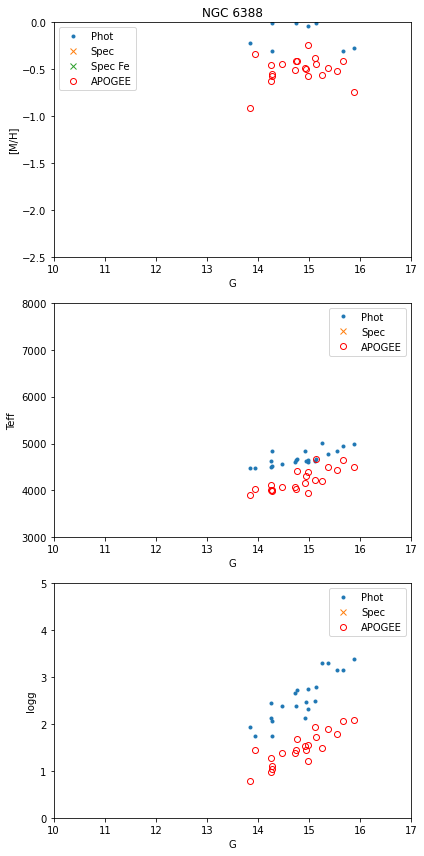

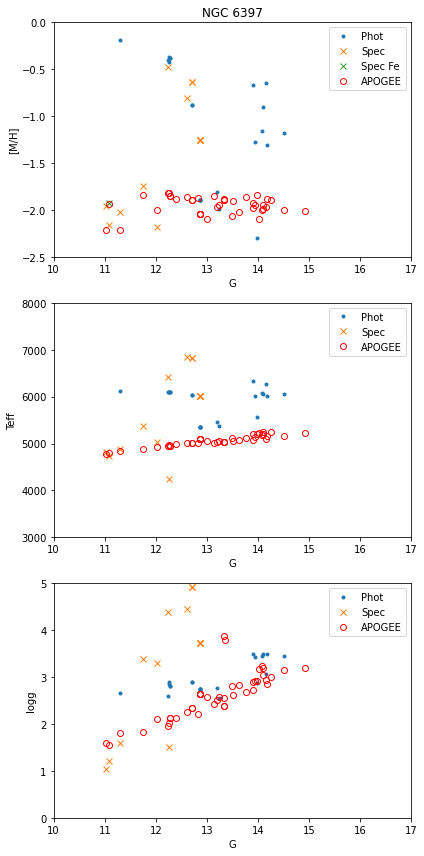

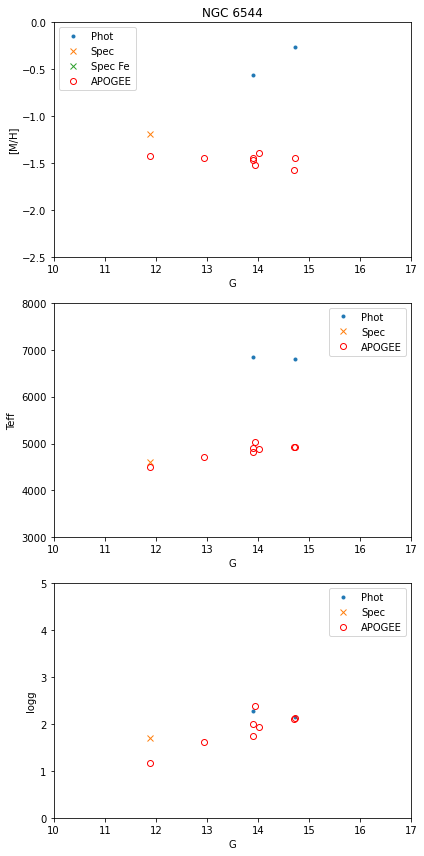

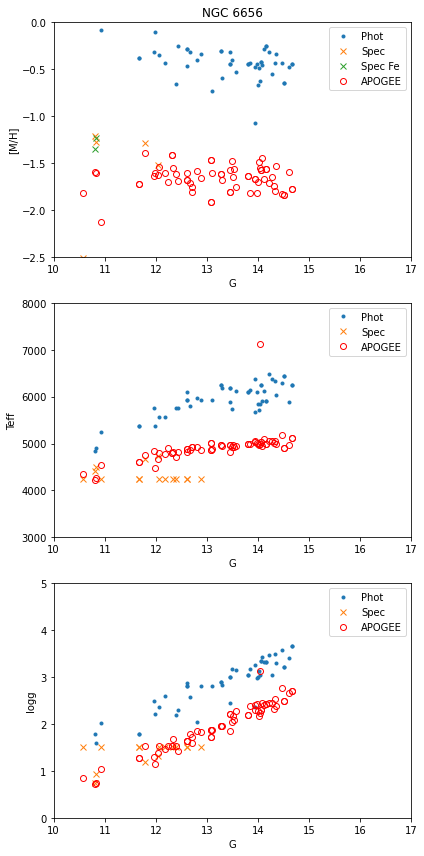

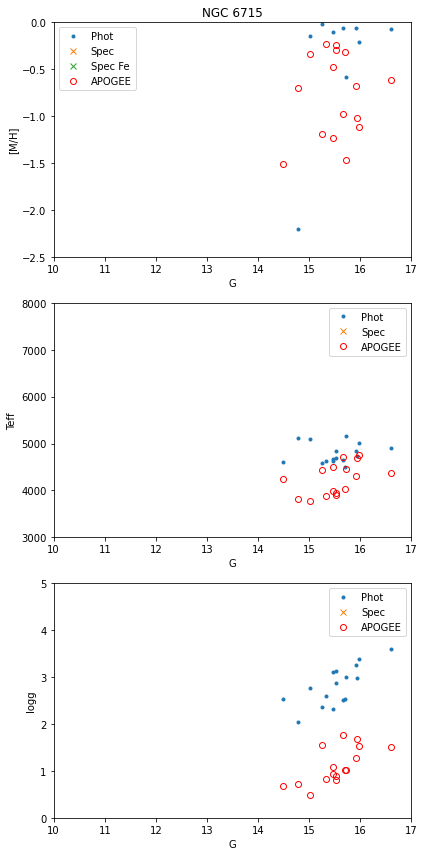

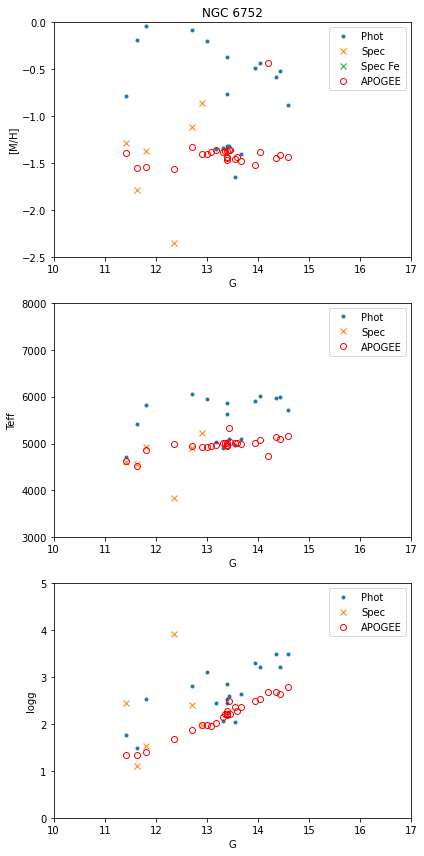

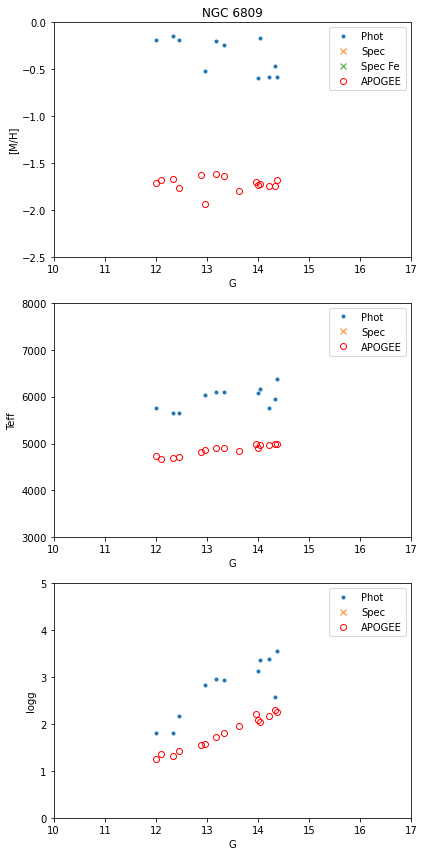

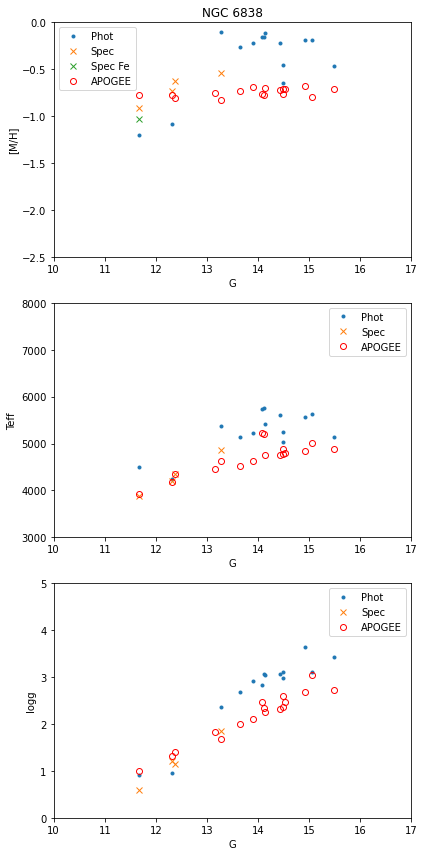

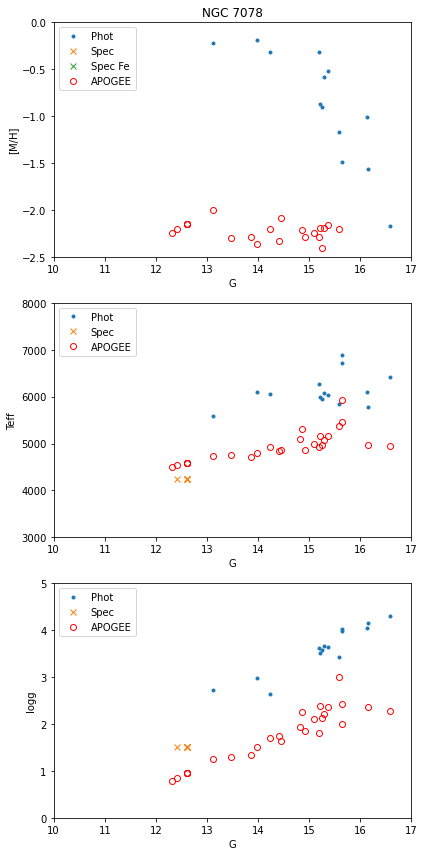

In [74]:
for cluster in good_clusters:
    ii1 = baumgardtall["Cluster"] == cluster
    ii2 = baumgardtall["P_Mem"] > 0.8
    ii3 = get_photcut(baumgardtall)
    gc = baumgardtall[ii1 & ii2 & ii3]
    
    fig, axes = plt.subplots(3, figsize=(6,12))
    plt.sca(axes[0])
    plt.plot(gc["phot_g_mean_mag"], gc["mh_gspphot"], '.', label="Phot")
    plt.plot(gc["phot_g_mean_mag"], gc["mh_gspspec"], 'x', label="Spec")
    plt.plot(gc["phot_g_mean_mag"], gc["fem_gspspec"]+gc["mh_gspspec"], 'x', label="Spec Fe")

    plt.plot(gc["phot_g_mean_mag"], gc["M_H"], 'o', mfc='none', mec='r', label="APOGEE")

    plt.xlabel("G")
    plt.ylabel("[M/H]")
    plt.legend()
    plt.title(cluster)

    plt.sca(axes[1])
    plt.plot(gc["phot_g_mean_mag"], gc["teff_gspphot"], '.', label="Phot")
    plt.plot(gc["phot_g_mean_mag"], gc["teff_gspspec"], 'x', label="Spec")
    plt.plot(gc["phot_g_mean_mag"], gc["TEFF"], 'o', mfc='none', mec='r', label="APOGEE")

    plt.xlabel("G")
    plt.ylabel("Teff")
    plt.legend()


    plt.sca(axes[2])
    plt.plot(gc["phot_g_mean_mag"], gc["logg_gspphot"], '.', label="Phot")
    plt.plot(gc["phot_g_mean_mag"], gc["logg_gspspec"], 'x', label="Spec")
    plt.plot(gc["phot_g_mean_mag"], gc["LOGG"], 'o', mfc='none', mec='r', label="APOGEE")

    plt.xlabel("G")
    plt.ylabel("logg")
    plt.legend()

    for ax in axes:
        ax.set_xlim(10, 17)
    axes[0].set_ylim(-2.5,0)
    axes[1].set_ylim(3000,8000)
    axes[2].set_ylim(0,5)
    fig.tight_layout()
    fig.savefig(f"gc_plots/{cluster.replace(' ','_')}.png")

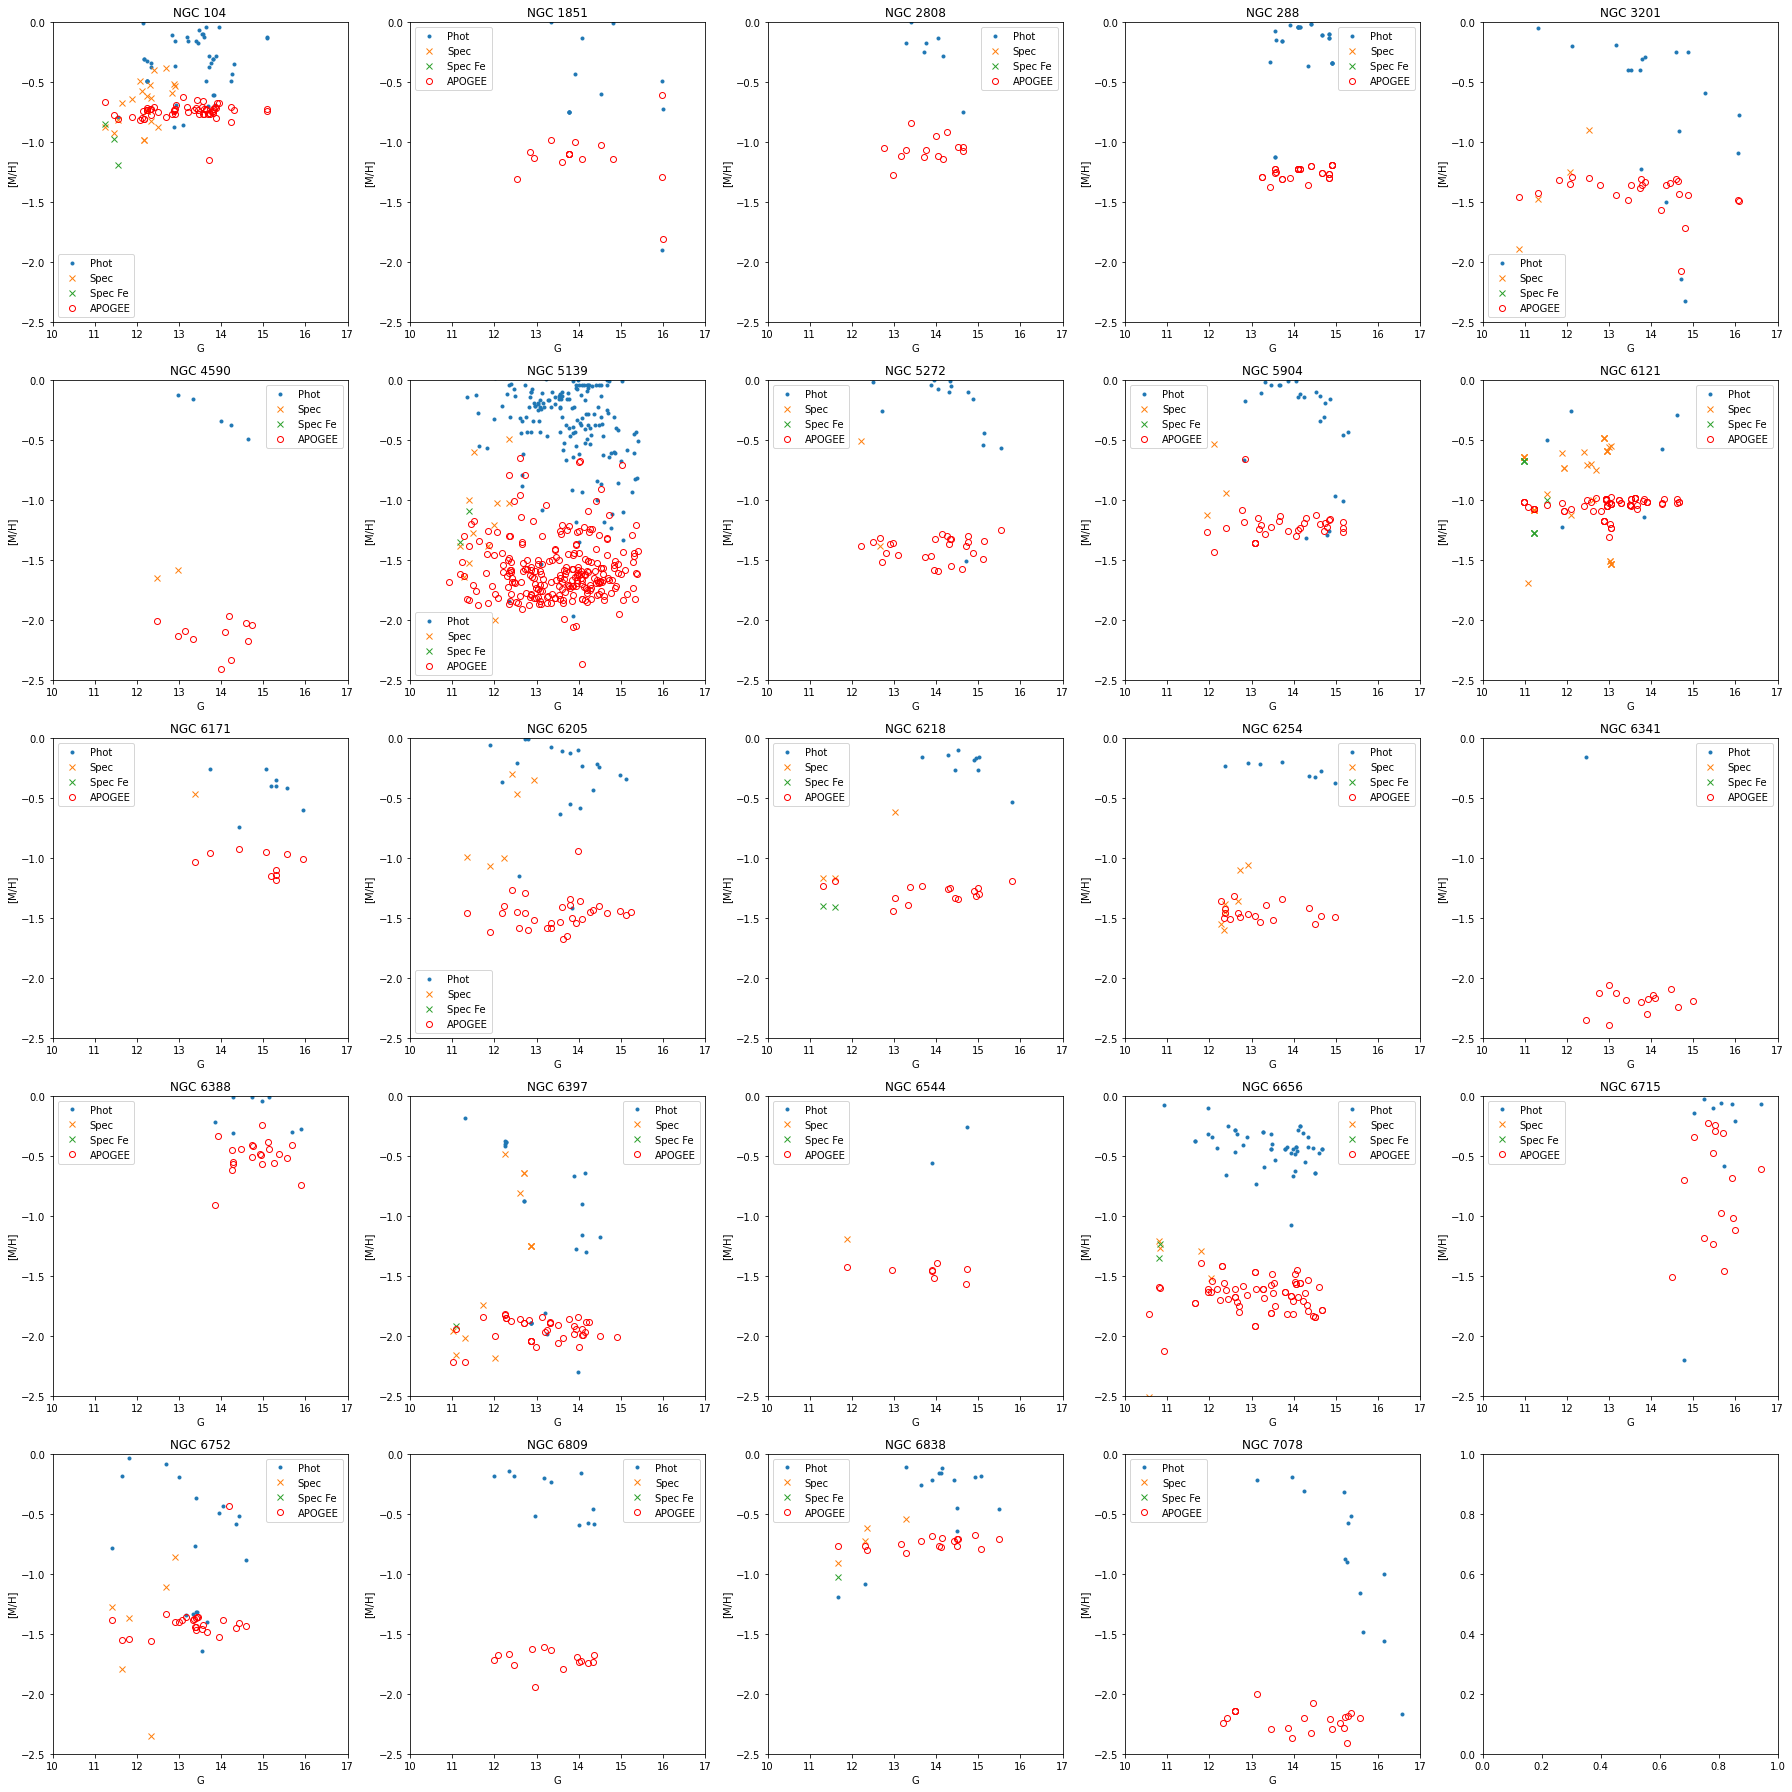

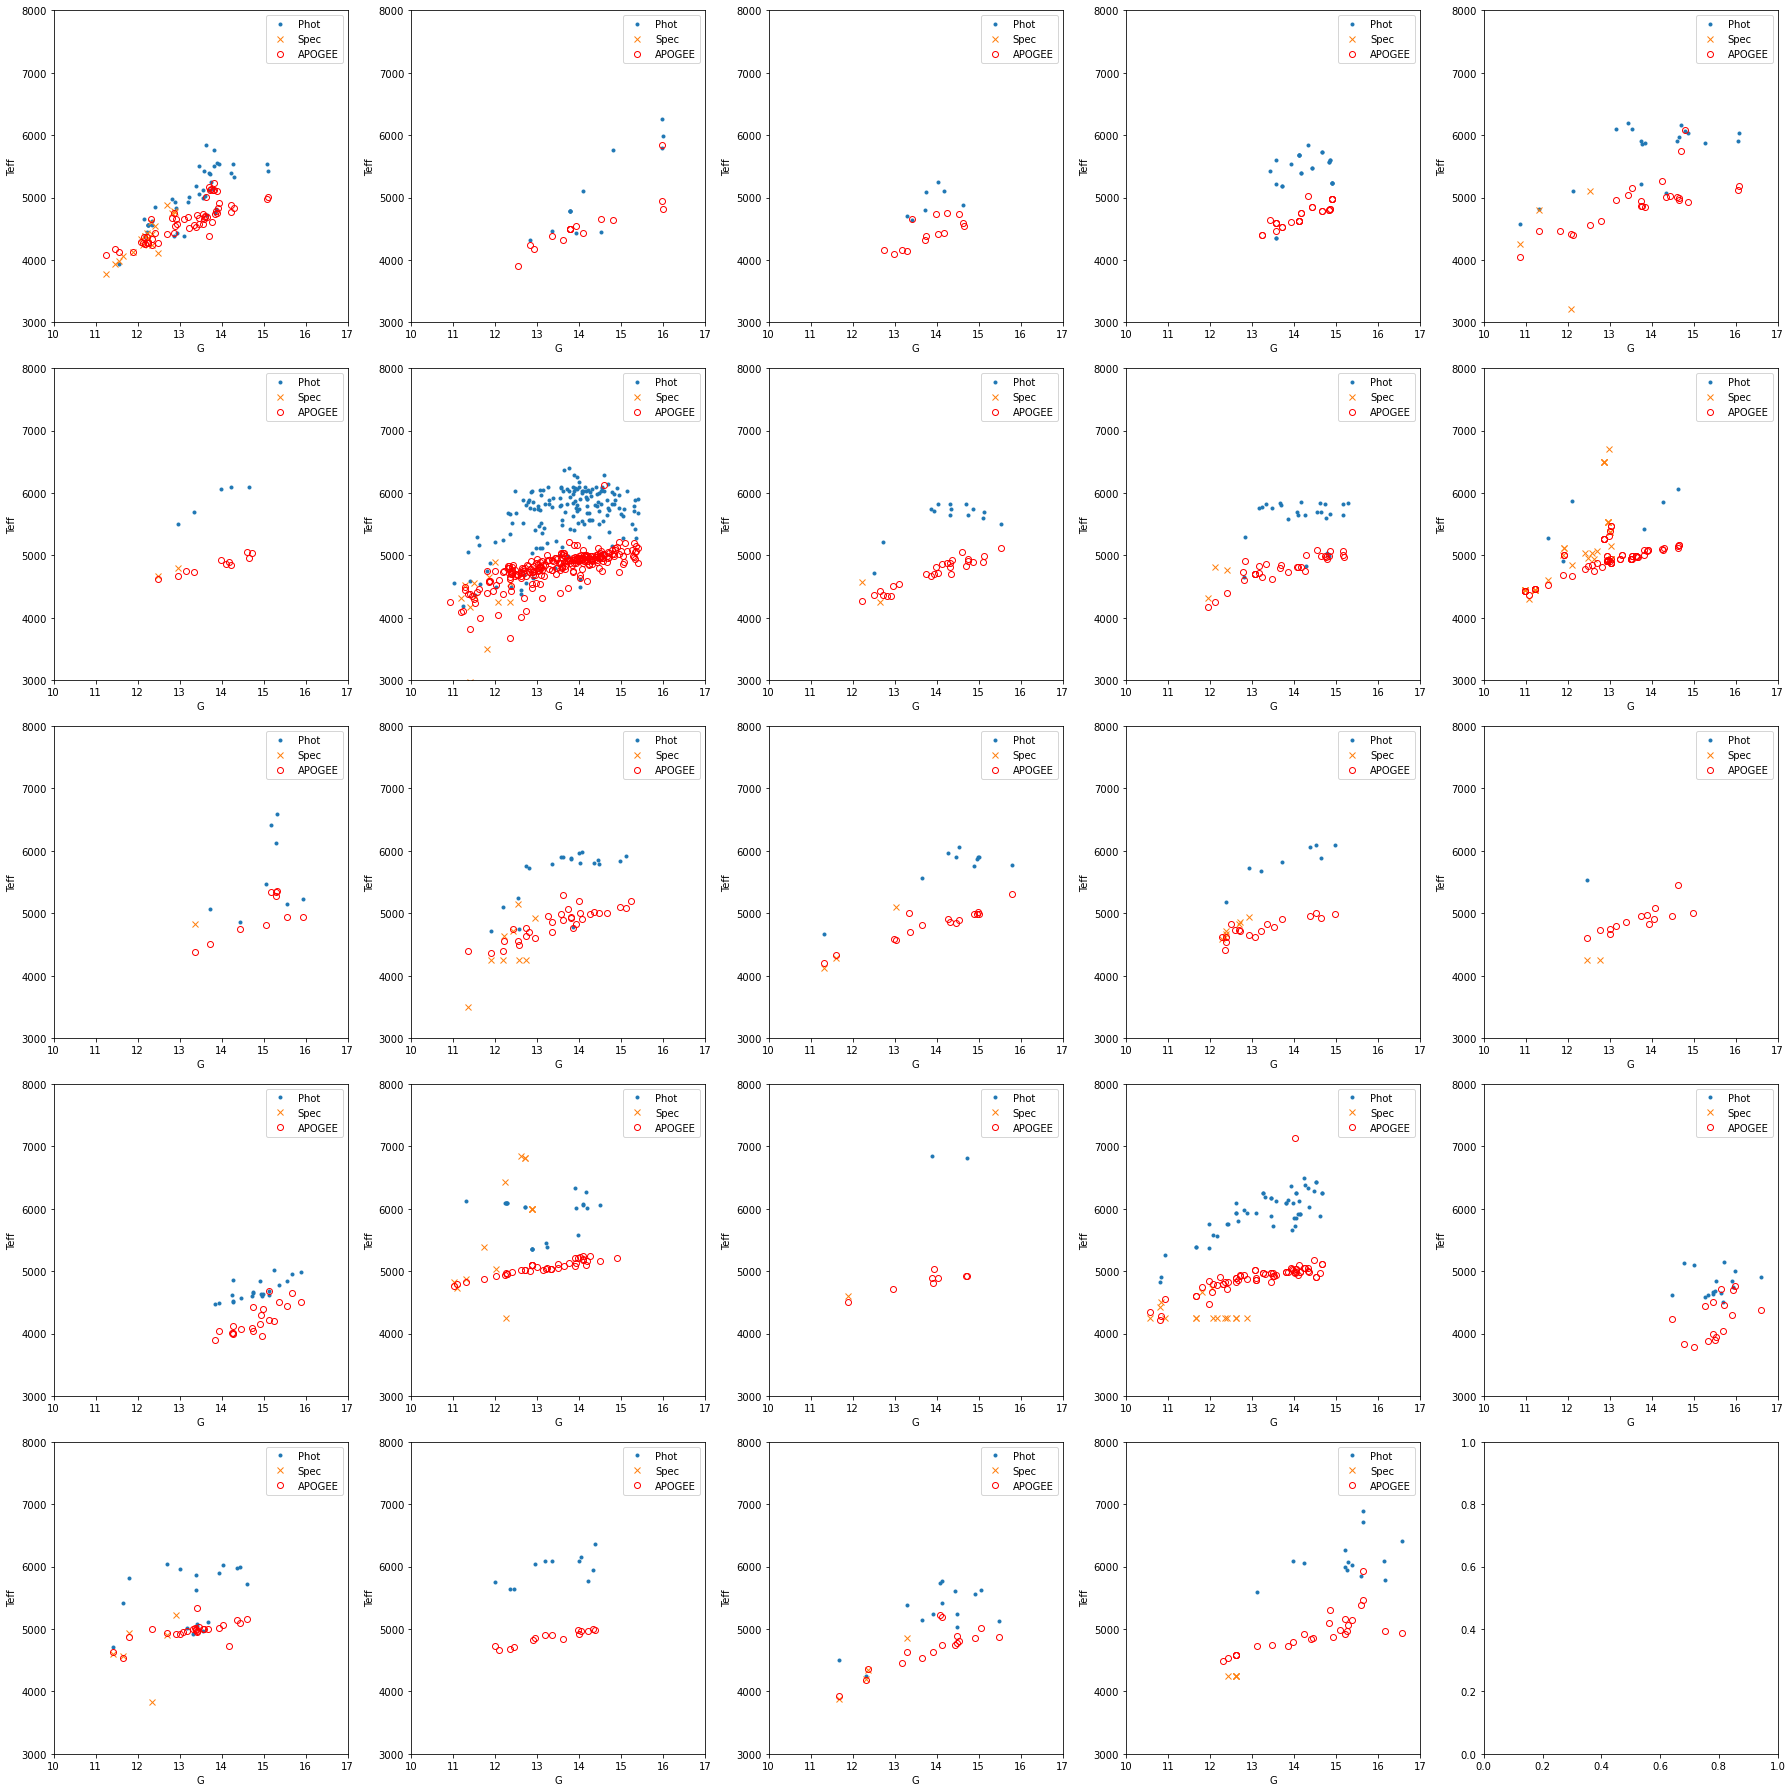

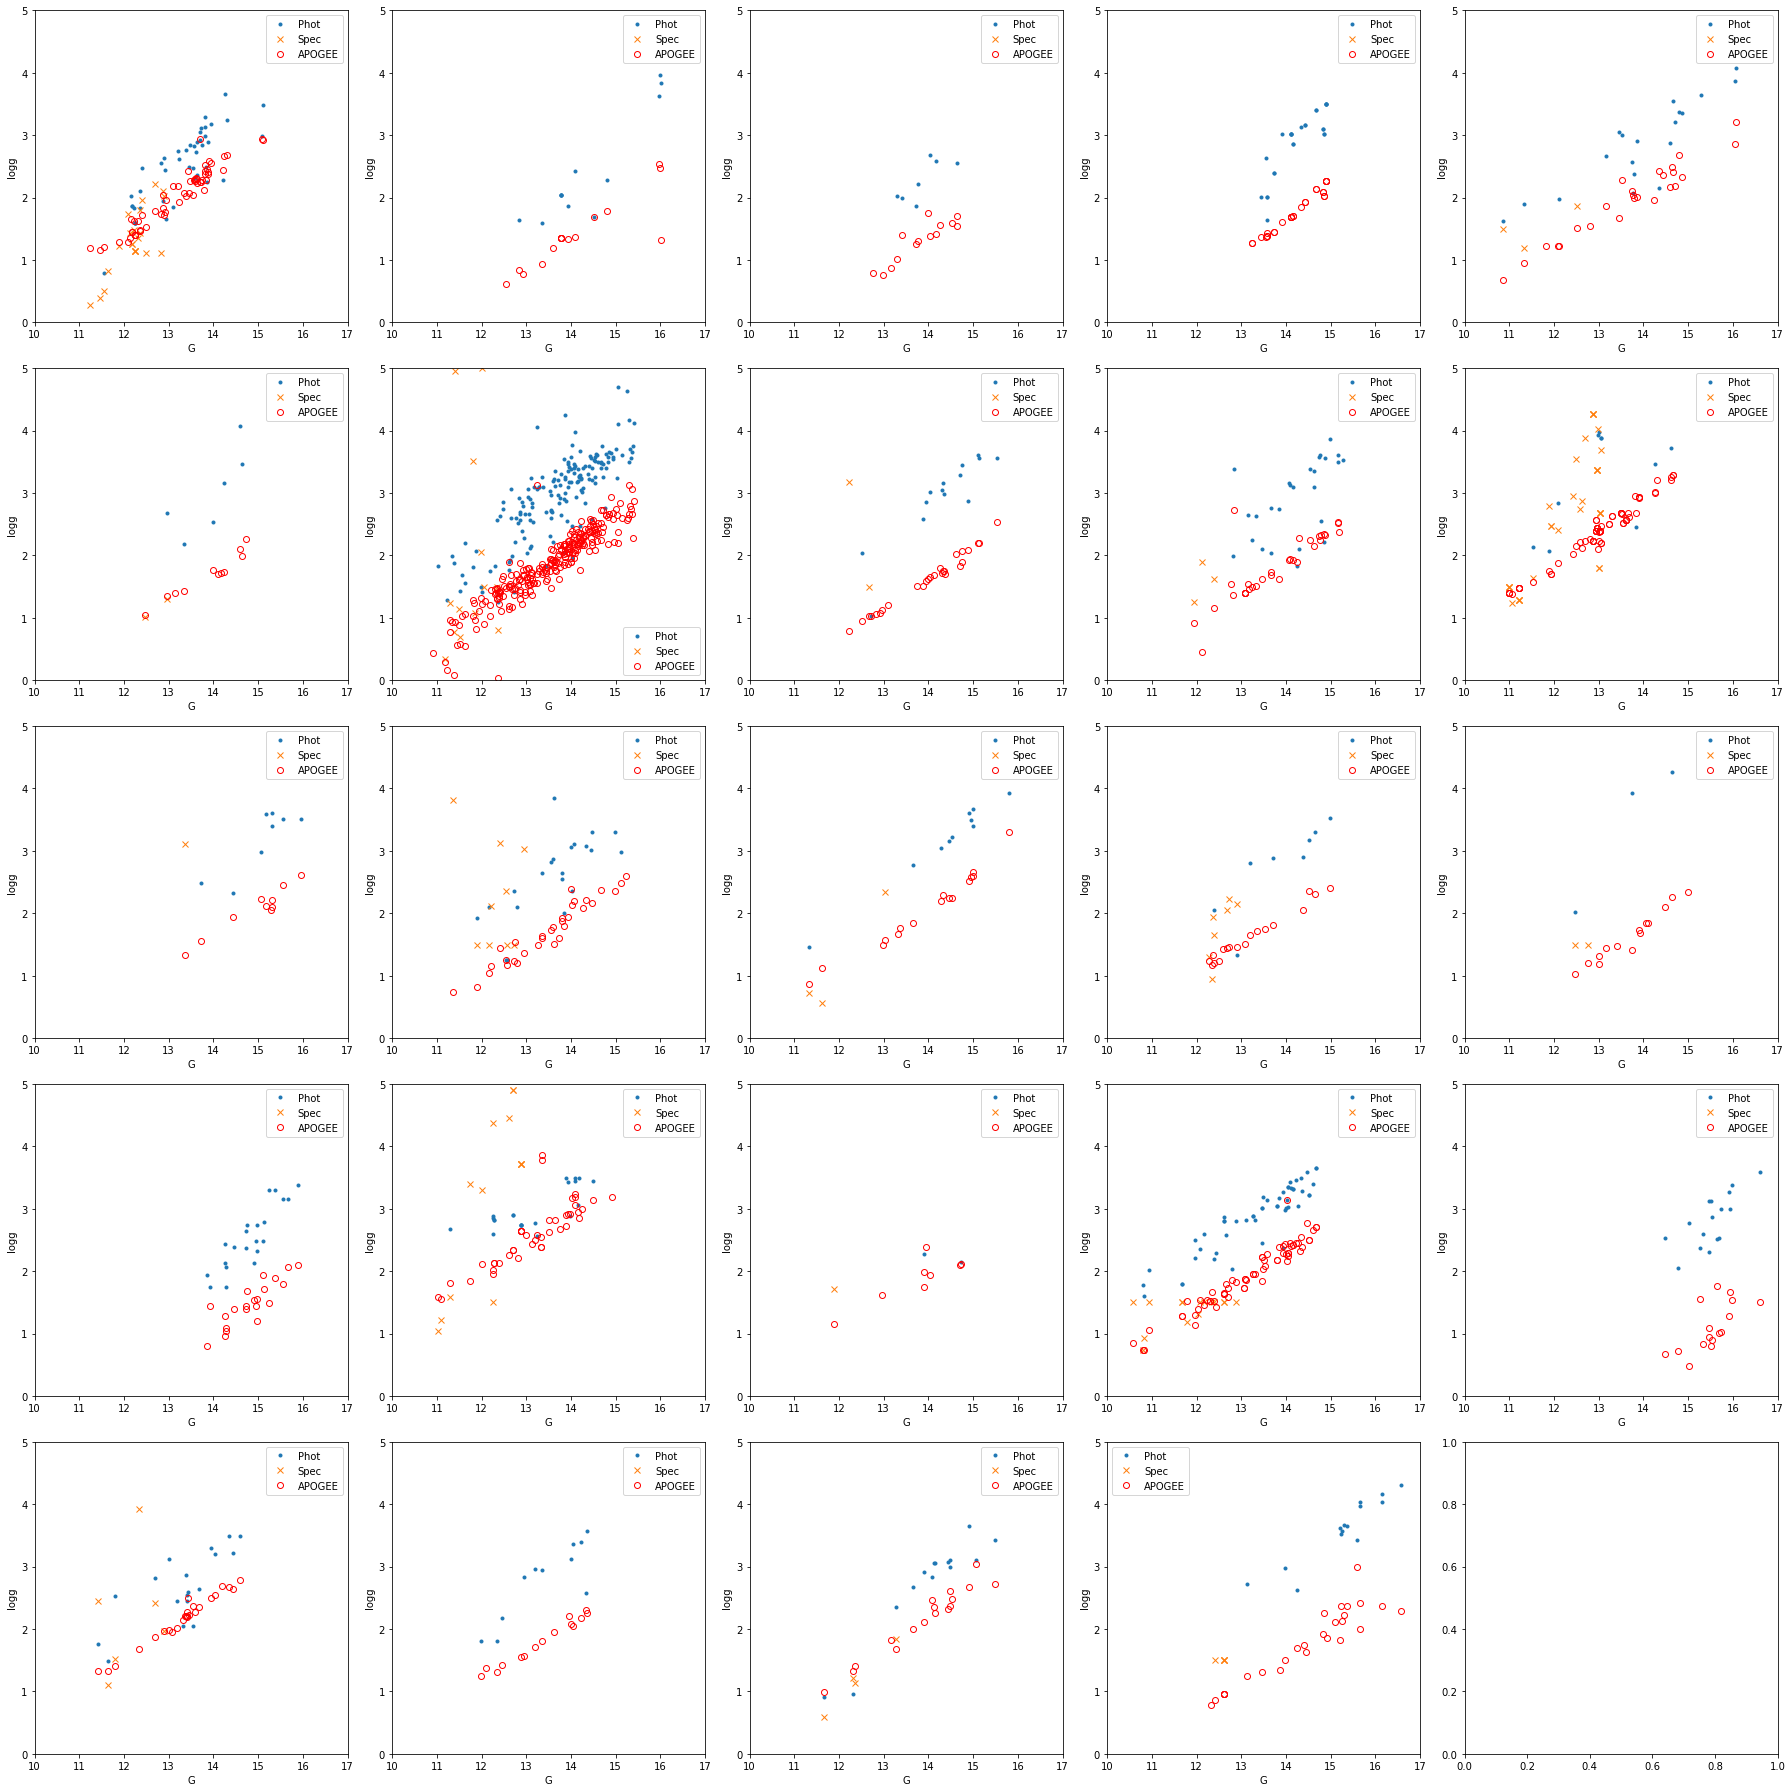

In [77]:
fig1, axes1 = plt.subplots(5, 5, figsize=(5*5, 5*5))
fig2, axes2 = plt.subplots(5, 5, figsize=(5*5, 5*5))
fig3, axes3 = plt.subplots(5, 5, figsize=(5*5, 5*5))
for cluster, ax1, ax2, ax3 in zip(good_clusters, axes1.flat, axes2.flat, axes3.flat):
    ii1 = baumgardtall["Cluster"] == cluster
    ii2 = baumgardtall["P_Mem"] > 0.8
    ii3 = get_photcut(baumgardtall)
    gc = baumgardtall[ii1 & ii2 & ii3]
    
    axes = [ax1, ax2, ax3]
    plt.sca(axes[0])
    plt.plot(gc["phot_g_mean_mag"], gc["mh_gspphot"], '.', label="Phot")
    plt.plot(gc["phot_g_mean_mag"], gc["mh_gspspec"], 'x', label="Spec")
    plt.plot(gc["phot_g_mean_mag"], gc["fem_gspspec"]+gc["mh_gspspec"], 'x', label="Spec Fe")

    plt.plot(gc["phot_g_mean_mag"], gc["M_H"], 'o', mfc='none', mec='r', label="APOGEE")

    plt.xlabel("G")
    plt.ylabel("[M/H]")
    plt.legend()
    plt.title(cluster)

    plt.sca(axes[1])
    plt.plot(gc["phot_g_mean_mag"], gc["teff_gspphot"], '.', label="Phot")
    plt.plot(gc["phot_g_mean_mag"], gc["teff_gspspec"], 'x', label="Spec")
    plt.plot(gc["phot_g_mean_mag"], gc["TEFF"], 'o', mfc='none', mec='r', label="APOGEE")

    plt.xlabel("G")
    plt.ylabel("Teff")
    plt.legend()


    plt.sca(axes[2])
    plt.plot(gc["phot_g_mean_mag"], gc["logg_gspphot"], '.', label="Phot")
    plt.plot(gc["phot_g_mean_mag"], gc["logg_gspspec"], 'x', label="Spec")
    plt.plot(gc["phot_g_mean_mag"], gc["LOGG"], 'o', mfc='none', mec='r', label="APOGEE")

    plt.xlabel("G")
    plt.ylabel("logg")
    plt.legend()

    for ax in axes:
        ax.set_xlim(10, 17)
    axes[0].set_ylim(-2.5,0)
    axes[1].set_ylim(3000,8000)
    axes[2].set_ylim(0,5)
for fig, label in zip([fig1, fig2, fig3],
                      ["MH","Teff","logg"]):
    fig.tight_layout()
    fig.savefig(f"gc_plots/GCs_{label}.pdf")

In [75]:
len(good_clusters)

24